In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import joblib as jlb
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
data.columns = data.columns.str.strip(" ")

In [4]:
data.head(7)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
data.drop("loan_id", axis=1, inplace = True)

In [7]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


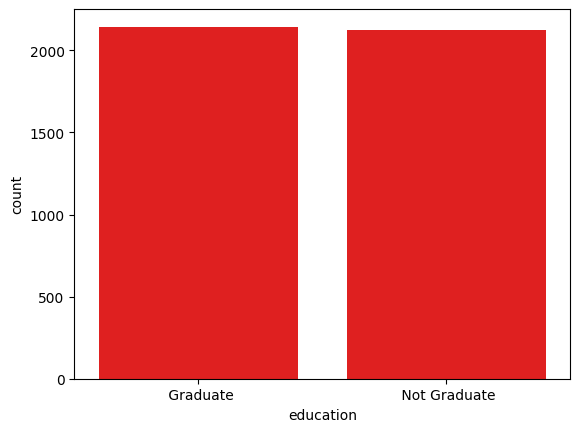

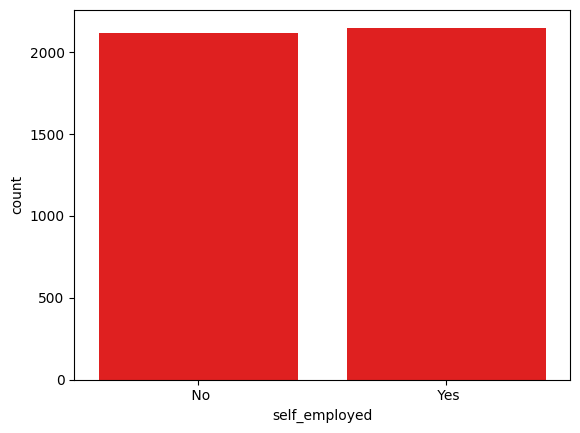

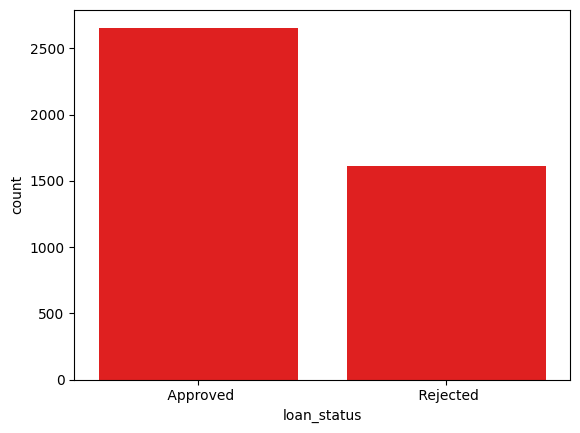

In [8]:
for col in data:
    if data[col].dtype=="object":
        sns.countplot(data=data, x=col, color="Red")
        plt.show()

In [9]:
def encoding_features(dataframe):
    education_mapping = {"Graduate": 1, "Not Graduate": 2}
    self_employed_mapping = {"Yes": 1, "No": 2}
    loan_status_mapping = {"Approved":1, "Rejected":2}
    dataframe = dataframe.copy()
    dataframe["EducationEncoding"] = dataframe["education"].map(lambda x: education_mapping.get(x.strip()))
    dataframe["LoanStatusEncoding"] = dataframe["loan_status"].map(lambda x: loan_status_mapping.get(x.strip()))
    dataframe["SelfEmployedEncoding"] = dataframe["self_employed"].map(lambda x: self_employed_mapping.get(x.strip()))
    
    return dataframe

data = encoding_features(data)
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,EducationEncoding,LoanStatusEncoding,SelfEmployedEncoding
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1,1,2
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,2,2,1
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1,2,2
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1,2,2
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,2,2,1


In [10]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'EducationEncoding', 'LoanStatusEncoding',
       'SelfEmployedEncoding'],
      dtype='object')

In [14]:
x = data.drop(["education", "loan_status", "self_employed", "LoanStatusEncoding", "cibil_score"], axis=1)
y = data["LoanStatusEncoding"]

In [15]:
print(x.columns)

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'EducationEncoding',
       'SelfEmployedEncoding'],
      dtype='object')


In [16]:
print(x,y)

      no_of_dependents  income_annum  loan_amount  loan_term  \
0                    2       9600000     29900000         12   
1                    0       4100000     12200000          8   
2                    3       9100000     29700000         20   
3                    3       8200000     30700000          8   
4                    5       9800000     24200000         20   
...                ...           ...          ...        ...   
4264                 5       1000000      2300000         12   
4265                 0       3300000     11300000         20   
4266                 2       6500000     23900000         18   
4267                 1       4100000     12800000          8   
4268                 1       9200000     29700000         10   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000             22700000   
1                      2700000                  2200000              88

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
model = DecisionTreeClassifier()

In [19]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model.predict(x_test)  # Make predictions on the test data

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)*100
msa = mean_absolute_error(y_test, y_pred)
accuracy = model.score(x,y)*100
print('Decision Tree Classifier Score')
print('-------------------------------')
print(f"Model Accuracy: {accuracy}") #Print Model accuracy
print(f'R2 Score: {r2}')  # Print R2 Score
print(f'Mean Absolute Error: {msa}')  # Print Mean Absolute Error

Decision Tree Classifier Score
-------------------------------
Model Accuracy: 91.309440149918
R2 Score: -82.22989100739075
Mean Absolute Error: 0.4344262295081967


In [21]:
jlb.dump(model, "loan_approval_model.model")

['loan_approval_model.model']